# AP Research Data Processing Notebook 5: Determine Optimal Scale For Electroreduction
The following codes in this Jupyter notebook (E0.ipynb) contains the data analysis portion of Benjamin Chang's AP Research project on *Optimal Conditions For Small-Scale Electroreduction of Common Non-Steroidal Anti-Inflammatory Drugs*. All charts, graScales, and figures are produced from the raw data in .csv files and manipulated by the following codes.

## Initializing Libraries and Style

In [1957]:
#importing libraries
import pandas as pd
import numpy as np
import scipy.stats
import math
from matplotlib import pyplot
from IPython.display import display, HTML

In [1958]:
font = {
    'family' : 'georgia',
    'color': 'black',
    'weight': 'normal',
    'size': 11
}

## Salicylic Acid

In [1970]:
#Merging the data into one dataframe
csv_file_list = ['E4-SA/E4-SA-5.csv', 'E4-SA/E4-SA-10.csv', 'E4-SA/E4-SA-15.csv', 'E4-SA/E4-SA-20.csv']

list_of_dataframes = []

for filename in csv_file_list:
    list_of_dataframes.append(pd.read_csv(filename))

merged_df = pd.concat(list_of_dataframes)

In [1971]:
#Find the percent difference between Absorbance Before and Absorbance After
merged_df['Percent Difference (%)'] = (merged_df['Absorbance After (Au)'] - merged_df['Absorbance Before (Au)'])/merged_df['Absorbance Before (Au)']
merged_df['Percent Difference (%)'] = merged_df['Percent Difference (%)']*100

#Find difference between Absorbance Before and Absorbance After
merged_df['Mean Difference'] = merged_df['Absorbance After (Au)'] - merged_df['Absorbance Before (Au)']

In [1972]:
#Create a numpy array of standard deviation and store it in the dataframe
std = []
for i in range(5, 25, 5):
    std.append(merged_df.loc[merged_df['Scale'] == i]['Mean Difference'].std())

arr = np.array(std)

#Compute the average of every 5 rows and condense the dataframe
merged_df = merged_df.groupby(np.arange(len(merged_df))//5).mean()
df = pd.DataFrame({'Standard Deviation': arr})

#Join two dataframes
merged_df = pd.concat([merged_df, df], axis=1, join='inner')

In [1973]:
#Compute the t-value (confidence level = 5%, df = 4)
t_value = scipy.stats.t.ppf(q=1-.05/2,df=4)

#Create a numpy array of intervals and store it into the dataframe
intervals = []
for i in range(5, 25, 5):
    interval = t_value * merged_df.loc[merged_df['Scale'] == i]['Standard Deviation'] / math.sqrt(5)
    intervals.append(interval)
intervals = np.array(intervals, dtype='float')
#Squeeze into one dimension
intervals = np.squeeze(intervals)

#Create new dataframe
df2 = pd.DataFrame({'Interval': intervals}, index=[0, 1, 2, 3])

#Join two dataframes
merged_df = pd.concat([merged_df, df2], axis=1, join='inner')

In [1974]:
#Create a numpy array of lower bounds and store it into the datagrame
lbd = []
for i in range(5, 25, 5):
    interval = t_value * merged_df.loc[merged_df['Scale'] == i]['Standard Deviation'] / math.sqrt(5)
    mean = merged_df.loc[merged_df['Scale'] == i]['Mean Difference']
    lbd.append(mean - interval)
lbd = np.array(lbd, dtype='float')
#Squeeze into one dimension
lbd = np.squeeze(lbd)

#Create new dataframe
df = pd.DataFrame({'Lower Bound': lbd}, index=[0, 1, 2, 3])

#Join two dataframes
merged_df = pd.concat([merged_df, df], axis=1, join='inner')

In [1975]:
#Create a numpy array of upper bounds and store it into the datagrame
ubd = []
for i in range(5, 25, 5):
    interval = t_value * merged_df.loc[merged_df['Scale'] == i]['Standard Deviation'] / math.sqrt(5)
    mean = merged_df.loc[merged_df['Scale'] == i]['Mean Difference']
    ubd.append(mean + interval)
ubd = np.array(ubd, dtype='float')
#Squeeze into one dimension
ubd = np.squeeze(ubd)

#Create new dataframe
df1 = pd.DataFrame({'Upper Bound': ubd}, index=[0, 1, 2, 3])

#Join two dataframes
merged_df = pd.concat([merged_df, df1], axis=1, join='inner')

In [1976]:
#Create a numpy array of upper bounds and store it into the datagrame
full = []
for i in range(5, 25, 5):
    mean = merged_df.loc[merged_df['Scale'] == i]['Mean Difference'].round(5).apply(str)
    interval = merged_df.loc[merged_df['Scale'] == i]['Interval'].round(5).apply(str)
    # Store string 
    full.append(mean + ' ± ' + interval)
full = np.array(full, dtype='object')

# Squeeze into one dimension
full = np.squeeze(full)

#Create new dataframe
df = pd.DataFrame({'Confidence Interval': full}, index=[0, 1, 2, 3])

#Join two dataframes
merged_df = pd.concat([merged_df, df], axis=1, join='inner')

#Remove trial column from dataframe
merged_df = merged_df.drop(['Trial'], axis=1)

#Save to new csv file
merged_df.to_csv('Processed Data/E4-SA-Processed.csv')

# Keep only the columns we need
save_dfSA = merged_df[['Scale', 'Percent Difference (%)', 'Mean Difference', 'Interval']]

#Output table as HTML
merged_df.to_html('Tables/E4-SA-Table.html')
merged_df

,Scale,Wavelength (nm),Absorbance Before (Au),Absorbance After (Au),Percent Difference (%),Mean Difference,Standard Deviation,Interval,Lower Bound,Upper Bound,Confidence Interval
0,5.0,330.0,0.16838,0.15832,-5.974564,-0.01006,0.000182,0.000226,-0.010286,-0.009834,-0.01006 ± 0.00023
1,10.0,330.0,0.16844,0.15350,-8.869338,-0.01494,0.000397,0.000494,-0.015434,-0.014446,-0.01494 ± 0.00049
2,15.0,330.0,0.16838,0.14944,-11.248409,-0.01894,0.000182,0.000226,-0.019166,-0.018714,-0.01894 ± 0.00023
3,20.0,330.0,0.16838,0.14056,-16.522154,-0.02782,0.000239,0.000296,-0.028116,-0.027524,-0.02782 ± 0.0003


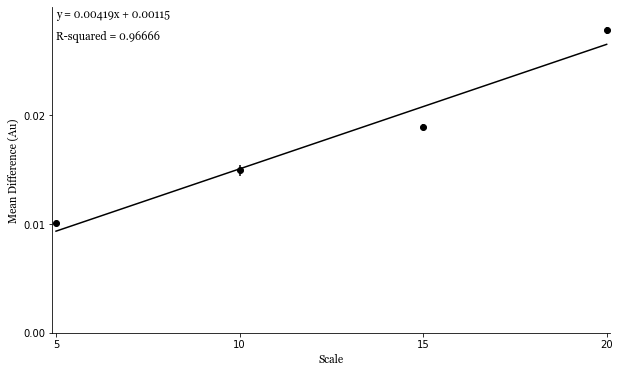

In [1977]:
#Add absolute value to mean difference to get magnitude
merged_df['Mean Difference'] = abs(merged_df['Mean Difference'])

#Figure size
pyplot.figure(figsize=(10, 6))

#Error bar
pyplot.errorbar(merged_df['Scale'], merged_df['Mean Difference'], yerr=merged_df['Interval'], fmt='ko')

#Labels use font initialized above
pyplot.xlabel('Scale', fontdict = font)
pyplot.ylabel('Mean Difference (Au)', fontdict = font)

#Fix x-axis and y-axis limits
pyplot.xlim(4.9, 20.1)
pyplot.ylim(0, 0.03)

#Fix x-axis and y-axis ticks
pyplot.xticks(np.arange(5, 25, 5))
pyplot.yticks(np.arange(0, 0.03, 0.01))

#Plot the linear regression line
pyplot.plot(np.arange(5, 25, 5), np.poly1d(np.polyfit(merged_df['Scale'], merged_df['Mean Difference'], 1))(np.arange(5, 25, 5)), color = 'black')

#Put the linear regression equation rounded to 5 digits on graScale in the center
pyplot.text(5, 0.029, 'y = ' + str(round(np.poly1d(np.polyfit(merged_df['Scale'], merged_df['Mean Difference'], 1))(0.5), 5)) + 'x + ' + str(round(np.polyfit(merged_df['Scale'], merged_df['Mean Difference'], 1)[0], 5)), fontdict = font)

#Put the R-squared value on graScale in the center
pyplot.text(5, 0.027, 'R-squared = ' + str(round(np.corrcoef(merged_df['Scale'], merged_df['Mean Difference'])[0, 1]**2, 5)), fontdict = font)

#Remove the top and right borders
pyplot.gca().spines['top'].set_visible(False)
pyplot.gca().spines['right'].set_visible(False)

#Save the figure
pyplot.savefig('Graphs/E4-SA-Graph.jpg', dpi=500)

#Show the figure
pyplot.show()

#Create new dataframe with column 1) sample 2) linear regression equation 3) R-squared value
dfr = pd.DataFrame({'Sample': ['E4-SA'], 'Linear Regression Equation': [str(round(np.poly1d(np.polyfit(merged_df['Scale'], merged_df['Mean Difference'], 1))(0.5), 5)) + 'x + ' + str(round(np.polyfit(merged_df['Scale'], merged_df['Mean Difference'], 1)[0], 5))], 'R-squared': [round(np.corrcoef(merged_df['Scale'], merged_df['Mean Difference'])[0, 1]**2, 5)]})

## Ethyl Alcohol

In [1978]:
#Merging the data into one dataframe
csv_file_list = ['E4-EA/E4-EA-5.csv', 'E4-EA/E4-EA-10.csv', 'E4-EA/E4-EA-15.csv', 'E4-EA/E4-EA-20.csv']

list_of_dataframes = []

for filename in csv_file_list:
    list_of_dataframes.append(pd.read_csv(filename))

merged_df = pd.concat(list_of_dataframes)

In [1979]:
#Find the percent difference between Absorbance Before and Absorbance After
merged_df['Percent Difference (%)'] = (merged_df['Absorbance After (Au)'] - merged_df['Absorbance Before (Au)'])/merged_df['Absorbance Before (Au)']
merged_df['Percent Difference (%)'] = merged_df['Percent Difference (%)']*100

#Find difference between Absorbance Before and Absorbance After
merged_df['Mean Difference'] = merged_df['Absorbance After (Au)'] - merged_df['Absorbance Before (Au)']

In [1980]:
#Create a numpy array of standard deviation and store it in the dataframe
std = []
for i in range(5, 25, 5):
    std.append(merged_df.loc[merged_df['Scale'] == i]['Mean Difference'].std())

arr = np.array(std)

#Compute the average of every 5 rows and condense the dataframe
merged_df = merged_df.groupby(np.arange(len(merged_df))//5).mean()
df = pd.DataFrame({'Standard Deviation': arr})

#Join two dataframes
merged_df = pd.concat([merged_df, df], axis=1, join='inner')

In [1981]:
#Compute the t-value (confidence level = 5%, df = 4)
t_value = scipy.stats.t.ppf(q=1-.05/2,df=4)

#Create a numpy array of intervals and store it into the dataframe
intervals = []
for i in range(5, 25, 5):
    interval = t_value * merged_df.loc[merged_df['Scale'] == i]['Standard Deviation'] / math.sqrt(5)
    intervals.append(interval)
intervals = np.array(intervals, dtype='float')
#Squeeze into one dimension
intervals = np.squeeze(intervals)

#Create new dataframe
df2 = pd.DataFrame({'Interval': intervals}, index=[0, 1, 2, 3])

#Join two dataframes
merged_df = pd.concat([merged_df, df2], axis=1, join='inner')

In [1982]:
#Create a numpy array of lower bounds and store it into the datagrame
lbd = []
for i in range(5, 25, 5):
    interval = t_value * merged_df.loc[merged_df['Scale'] == i]['Standard Deviation'] / math.sqrt(5)
    mean = merged_df.loc[merged_df['Scale'] == i]['Mean Difference']
    lbd.append(mean - interval)
lbd = np.array(lbd, dtype='float')
#Squeeze into one dimension
lbd = np.squeeze(lbd)

#Create new dataframe
df = pd.DataFrame({'Lower Bound': lbd}, index=[0, 1, 2, 3])

#Join two dataframes
merged_df = pd.concat([merged_df, df], axis=1, join='inner')

In [1983]:
#Create a numpy array of upper bounds and store it into the datagrame
ubd = []
for i in range(5, 25, 5):
    interval = t_value * merged_df.loc[merged_df['Scale'] == i]['Standard Deviation'] / math.sqrt(5)
    mean = merged_df.loc[merged_df['Scale'] == i]['Mean Difference']
    ubd.append(mean + interval)
ubd = np.array(ubd, dtype='float')
#Squeeze into one dimension
ubd = np.squeeze(ubd)

#Create new dataframe
df1 = pd.DataFrame({'Upper Bound': ubd}, index=[0, 1, 2, 3])

#Join two dataframes
merged_df = pd.concat([merged_df, df1], axis=1, join='inner')

In [1984]:
#Create a numpy array of upper bounds and store it into the datagrame
full = []
for i in range(5, 25, 5):
    mean = merged_df.loc[merged_df['Scale'] == i]['Mean Difference'].round(5).apply(str)
    interval = merged_df.loc[merged_df['Scale'] == i]['Interval'].round(5).apply(str)
    # Store string 
    full.append(mean + ' ± ' + interval)
full = np.array(full, dtype='object')

# Squeeze into one dimension
full = np.squeeze(full)

#Create new dataframe
df = pd.DataFrame({'Confidence Interval': full}, index=[0, 1, 2, 3])

#Join two dataframes
merged_df = pd.concat([merged_df, df], axis=1, join='inner')

#Remove trial column from dataframe
merged_df = merged_df.drop(['Trial'], axis=1)

#Save to new csv file
merged_df.to_csv('Processed Data/E4-EA-Processed.csv')

# Keep only the columns we need
save_dfEA = merged_df[['Scale', 'Percent Difference (%)', 'Mean Difference', 'Interval']]

#Output table as HTML
merged_df.to_html('Tables/E4-EA-Table.html')
merged_df

,Scale,Wavelength (nm),Absorbance Before (Au),Absorbance After (Au),Percent Difference (%),Mean Difference,Standard Deviation,Interval,Lower Bound,Upper Bound,Confidence Interval
0,5.0,330.0,0.45920,0.38926,-15.230832,-0.06994,0.000195,0.000242,-0.070182,-0.069698,-0.06994 ± 0.00024
1,10.0,330.0,0.45922,0.32760,-28.661653,-0.13162,0.000370,0.000460,-0.132080,-0.131160,-0.13162 ± 0.00046
2,15.0,330.0,0.45920,0.29850,-34.995650,-0.16070,0.000265,0.000329,-0.161029,-0.160371,-0.1607 ± 0.00033
3,20.0,330.0,0.45920,0.28544,-37.839722,-0.17376,0.000270,0.000335,-0.174095,-0.173425,-0.17376 ± 0.00034


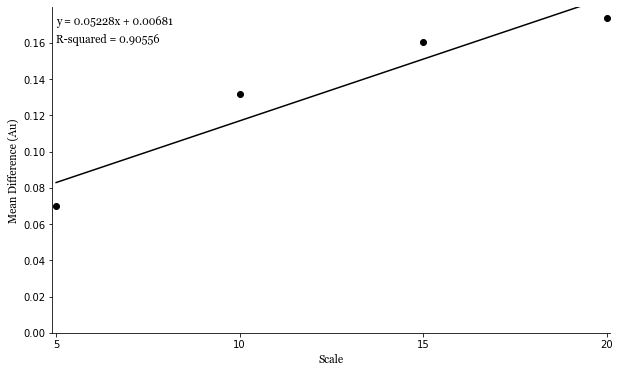

In [1985]:
#Add absolute value to mean difference to get magnitude
merged_df['Mean Difference'] = abs(merged_df['Mean Difference'])

#Figure size
pyplot.figure(figsize=(10, 6))

#Error bar
pyplot.errorbar(merged_df['Scale'], merged_df['Mean Difference'], yerr=merged_df['Interval'], fmt='ko')

#Labels use font initialized above
pyplot.xlabel('Scale', fontdict = font)
pyplot.ylabel('Mean Difference (Au)', fontdict = font)

#Fix x-axis and y-axis limits
pyplot.xlim(4.9, 20.1)
pyplot.ylim(0, 0.18)

#Fix x-axis and y-axis ticks
pyplot.xticks(np.arange(5, 25, 5))
pyplot.yticks(np.arange(0, 0.18, 0.02))

#Plot the linear regression line
pyplot.plot(np.arange(5, 25, 5), np.poly1d(np.polyfit(merged_df['Scale'], merged_df['Mean Difference'], 1))(np.arange(5, 25, 5)), color = 'black')

#Put the linear regression equation rounded to 5 digits on graScale in the center
pyplot.text(5, 0.17, 'y = ' + str(round(np.poly1d(np.polyfit(merged_df['Scale'], merged_df['Mean Difference'], 1))(0.5), 5)) + 'x + ' + str(round(np.polyfit(merged_df['Scale'], merged_df['Mean Difference'], 1)[0], 5)), fontdict = font)

#Put the R-squared value on graScale in the center
pyplot.text(5, 0.16, 'R-squared = ' + str(round(np.corrcoef(merged_df['Scale'], merged_df['Mean Difference'])[0, 1]**2, 5)), fontdict = font)

#Remove the top and right borders
pyplot.gca().spines['top'].set_visible(False)
pyplot.gca().spines['right'].set_visible(False)

#Save the figure
pyplot.savefig('Graphs/E4-EA-Graph.jpg', dpi=500)

#Show the figure
pyplot.show()

#Create new dataframe with column 1) sample 2) linear regression equation 3) R-squared value
dfrr = {'Sample': 'E4-EA', 'Linear Regression Equation': str(round(np.poly1d(np.polyfit(merged_df['Scale'], merged_df['Mean Difference'], 1))(0), 5)) + 'x + ' + str(round(np.poly1d(np.polyfit(merged_df['Scale'], merged_df['Mean Difference'], 1))(1), 5)), 'R-squared': round(np.corrcoef(merged_df['Scale'], merged_df['Mean Difference'])[0, 1]**2, 5)}
dfr = dfr.append(dfrr, ignore_index = True)

## Citric Acid Monohydrate

In [1986]:
#Merging the data into one dataframe
csv_file_list = ['E4-CAM/E4-CAM-5.csv', 'E4-CAM/E4-CAM-10.csv', 'E4-CAM/E4-CAM-15.csv', 'E4-CAM/E4-CAM-20.csv']

list_of_dataframes = []

for filename in csv_file_list:
    list_of_dataframes.append(pd.read_csv(filename))

merged_df = pd.concat(list_of_dataframes)

In [1987]:
#Find the percent difference between Absorbance Before and Absorbance After
merged_df['Percent Difference (%)'] = (merged_df['Absorbance After (Au)'] - merged_df['Absorbance Before (Au)'])/merged_df['Absorbance Before (Au)']
merged_df['Percent Difference (%)'] = merged_df['Percent Difference (%)']*100

#Find difference between Absorbance Before and Absorbance After
merged_df['Mean Difference'] = merged_df['Absorbance After (Au)'] - merged_df['Absorbance Before (Au)']

In [1988]:
#Create a numpy array of standard deviation and store it in the dataframe
std = []
for i in range(5, 25, 5):
    std.append(merged_df.loc[merged_df['Scale'] == i]['Mean Difference'].std())

arr = np.array(std)

#Compute the average of every 5 rows and condense the dataframe
merged_df = merged_df.groupby(np.arange(len(merged_df))//5).mean()
df = pd.DataFrame({'Standard Deviation': arr})

#Join two dataframes
merged_df = pd.concat([merged_df, df], axis=1, join='inner')

In [1989]:
#Compute the t-value (confidence level = 5%, df = 4)
t_value = scipy.stats.t.ppf(q=1-.05/2,df=4)

#Create a numpy array of intervals and store it into the dataframe
intervals = []
for i in range(5, 25, 5):
    interval = t_value * merged_df.loc[merged_df['Scale'] == i]['Standard Deviation'] / math.sqrt(5)
    intervals.append(interval)
intervals = np.array(intervals, dtype='float')
#Squeeze into one dimension
intervals = np.squeeze(intervals)

#Create new dataframe
df2 = pd.DataFrame({'Interval': intervals}, index=[0, 1, 2, 3])

#Join two dataframes
merged_df = pd.concat([merged_df, df2], axis=1, join='inner')

In [1990]:
#Create a numpy array of lower bounds and store it into the datagrame
lbd = []
for i in range(5, 25, 5):
    interval = t_value * merged_df.loc[merged_df['Scale'] == i]['Standard Deviation'] / math.sqrt(5)
    mean = merged_df.loc[merged_df['Scale'] == i]['Mean Difference']
    lbd.append(mean - interval)
lbd = np.array(lbd, dtype='float')
#Squeeze into one dimension
lbd = np.squeeze(lbd)

#Create new dataframe
df = pd.DataFrame({'Lower Bound': lbd}, index=[0, 1, 2, 3])

#Join two dataframes
merged_df = pd.concat([merged_df, df], axis=1, join='inner')

In [1991]:
#Create a numpy array of upper bounds and store it into the datagrame
ubd = []
for i in range(5, 25, 5):
    interval = t_value * merged_df.loc[merged_df['Scale'] == i]['Standard Deviation'] / math.sqrt(5)
    mean = merged_df.loc[merged_df['Scale'] == i]['Mean Difference']
    ubd.append(mean + interval)
ubd = np.array(ubd, dtype='float')
#Squeeze into one dimension
ubd = np.squeeze(ubd)

#Create new dataframe
df1 = pd.DataFrame({'Upper Bound': ubd}, index=[0, 1, 2, 3])

#Join two dataframes
merged_df = pd.concat([merged_df, df1], axis=1, join='inner')

In [1992]:
#Create a numpy array of upper bounds and store it into the datagrame
full = []
for i in range(5, 25, 5):
    mean = merged_df.loc[merged_df['Scale'] == i]['Mean Difference'].round(5).apply(str)
    interval = merged_df.loc[merged_df['Scale'] == i]['Interval'].round(5).apply(str)
    # Store string 
    full.append(mean + ' ± ' + interval)
full = np.array(full, dtype='object')

# Squeeze into one dimension
full = np.squeeze(full)

#Create new dataframe
df = pd.DataFrame({'Confidence Interval': full}, index=[0, 1, 2, 3])

#Join two dataframes
merged_df = pd.concat([merged_df, df], axis=1, join='inner')

#Remove trial column from dataframe
merged_df = merged_df.drop(['Trial'], axis=1)

#Save to new csv file
merged_df.to_csv('Processed Data/E4-CAM-Processed.csv')

# Keep only the columns we need
save_dfCAM = merged_df[['Scale', 'Percent Difference (%)', 'Mean Difference', 'Interval']]

#Output table as HTML
merged_df.to_html('Tables/E4-CAM-Table.html')
merged_df

,Scale,Wavelength (nm),Absorbance Before (Au),Absorbance After (Au),Percent Difference (%),Mean Difference,Standard Deviation,Interval,Lower Bound,Upper Bound,Confidence Interval
0,5.0,330.0,0.05744,0.05622,-2.122497,-0.00122,0.000277,0.000345,-0.001565,-0.000875,-0.00122 ± 0.00034
1,10.0,330.0,0.05752,0.04248,-26.147878,-0.01504,0.000152,0.000188,-0.015228,-0.014852,-0.01504 ± 0.00019
2,15.0,330.0,0.05744,0.03658,-36.313633,-0.02086,0.000527,0.000655,-0.021515,-0.020205,-0.02086 ± 0.00065
3,20.0,330.0,0.05744,0.02836,-50.625188,-0.02908,0.000396,0.000492,-0.029572,-0.028588,-0.02908 ± 0.00049


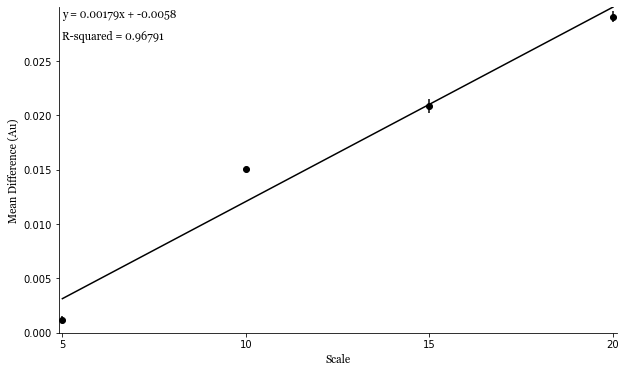

In [1993]:
#Add absolute value to mean difference to get magnitude
merged_df['Mean Difference'] = abs(merged_df['Mean Difference'])

#Figure size
pyplot.figure(figsize=(10, 6))

#Error bar
pyplot.errorbar(merged_df['Scale'], merged_df['Mean Difference'], yerr=merged_df['Interval'], fmt='ko')

#Labels use font initialized above
pyplot.xlabel('Scale', fontdict = font)
pyplot.ylabel('Mean Difference (Au)', fontdict = font)

#Fix x-axis and y-axis limits
pyplot.xlim(4.9, 20.1)
pyplot.ylim(0, 0.03)

#Fix x-axis and y-axis ticks
pyplot.xticks(np.arange(5, 25, 5))
pyplot.yticks(np.arange(0, 0.03, 0.005))

#Plot the linear regression line
pyplot.plot(np.arange(5, 25, 5), np.poly1d(np.polyfit(merged_df['Scale'], merged_df['Mean Difference'], 1))(np.arange(5, 25, 5)), color = 'black')

#Put the linear regression equation rounded to 5 digits on graScale in the center and absolute value slope
pyplot.text(5, 0.029, 'y = ' + str(round(np.poly1d(np.polyfit(merged_df['Scale'], merged_df['Mean Difference'], 1))[1], 5)) + 'x + ' + str(round(np.poly1d(np.polyfit(merged_df['Scale'], merged_df['Mean Difference'], 1))[0], 5)), fontdict = font)

#Put the R-squared value on graScale in the center
pyplot.text(5, 0.027, 'R-squared = ' + str(round(np.corrcoef(merged_df['Scale'], merged_df['Mean Difference'])[0, 1]**2, 5)), fontdict = font)

#Remove the top and right borders
pyplot.gca().spines['top'].set_visible(False)
pyplot.gca().spines['right'].set_visible(False)

#Save the figure
pyplot.savefig('Graphs/E4-CAM-Graph.jpg', dpi=500)

#Show the figure
pyplot.show()

#Create new dataframe with column 1) sample 2) linear regression equation 3) R-squared value
dfrr = {'Sample': 'E4-CAM', 'Linear Regression Equation': str(round(np.poly1d(np.polyfit(merged_df['Scale'], merged_df['Mean Difference'], 1))[1], 5)) + 'x + ' + str(round(np.poly1d(np.polyfit(merged_df['Scale'], merged_df['Mean Difference'], 1))[0], 5)), 'R-squared': round(np.corrcoef(merged_df['Scale'], merged_df['Mean Difference'])[0, 1]**2, 5)}
dfr = dfr.append(dfrr, ignore_index = True)

## Acetylsalicylic Acid

In [1994]:
#Merging the data into one dataframe
csv_file_list = ['E4-AA/E4-AA-5.csv', 'E4-AA/E4-AA-10.csv', 'E4-AA/E4-AA-15.csv', 'E4-AA/E4-AA-20.csv']

list_of_dataframes = []

for filename in csv_file_list:
    list_of_dataframes.append(pd.read_csv(filename))

merged_df = pd.concat(list_of_dataframes)

In [1995]:
#Find the percent difference between Absorbance Before and Absorbance After
merged_df['Percent Difference (%)'] = (merged_df['Absorbance After (Au)'] - merged_df['Absorbance Before (Au)'])/merged_df['Absorbance Before (Au)']
merged_df['Percent Difference (%)'] = merged_df['Percent Difference (%)']*100

#Find difference between Absorbance Before and Absorbance After
merged_df['Mean Difference'] = merged_df['Absorbance After (Au)'] - merged_df['Absorbance Before (Au)']

In [1996]:
#Create a numpy array of standard deviation and store it in the dataframe
std = []
for i in range(5, 25, 5):
    std.append(merged_df.loc[merged_df['Scale'] == i]['Mean Difference'].std())

arr = np.array(std)

#Compute the average of every 5 rows and condense the dataframe
merged_df = merged_df.groupby(np.arange(len(merged_df))//5).mean()
df = pd.DataFrame({'Standard Deviation': arr})

#Join two dataframes
merged_df = pd.concat([merged_df, df], axis=1, join='inner')

In [1997]:
#Compute the t-value (confidence level = 5%, df = 4)
t_value = scipy.stats.t.ppf(q=1-.05/2,df=4)

#Create a numpy array of intervals and store it into the dataframe
intervals = []
for i in range(5, 25, 5):
    interval = t_value * merged_df.loc[merged_df['Scale'] == i]['Standard Deviation'] / math.sqrt(5)
    intervals.append(interval)
intervals = np.array(intervals, dtype='float')
#Squeeze into one dimension
intervals = np.squeeze(intervals)

#Create new dataframe
df2 = pd.DataFrame({'Interval': intervals}, index=[0, 1, 2, 3])

#Join two dataframes
merged_df = pd.concat([merged_df, df2], axis=1, join='inner')

In [1998]:
#Create a numpy array of lower bounds and store it into the datagrame
lbd = []
for i in range(5, 25, 5):
    interval = t_value * merged_df.loc[merged_df['Scale'] == i]['Standard Deviation'] / math.sqrt(5)
    mean = merged_df.loc[merged_df['Scale'] == i]['Mean Difference']
    lbd.append(mean - interval)
lbd = np.array(lbd, dtype='float')
#Squeeze into one dimension
lbd = np.squeeze(lbd)

#Create new dataframe
df = pd.DataFrame({'Lower Bound': lbd}, index=[0, 1, 2, 3])

#Join two dataframes
merged_df = pd.concat([merged_df, df], axis=1, join='inner')

In [1999]:
#Create a numpy array of upper bounds and store it into the datagrame
ubd = []
for i in range(5, 25, 5):
    interval = t_value * merged_df.loc[merged_df['Scale'] == i]['Standard Deviation'] / math.sqrt(5)
    mean = merged_df.loc[merged_df['Scale'] == i]['Mean Difference']
    ubd.append(mean + interval)
ubd = np.array(ubd, dtype='float')
#Squeeze into one dimension
ubd = np.squeeze(ubd)

#Create new dataframe
df1 = pd.DataFrame({'Upper Bound': ubd}, index=[0, 1, 2, 3])

#Join two dataframes
merged_df = pd.concat([merged_df, df1], axis=1, join='inner')

In [2000]:
#Create a numpy array of upper bounds and store it into the datagrame
full = []
for i in range(5, 25, 5):
    mean = merged_df.loc[merged_df['Scale'] == i]['Mean Difference'].round(5).apply(str)
    interval = merged_df.loc[merged_df['Scale'] == i]['Interval'].round(5).apply(str)
    # Store string 
    full.append(mean + ' ± ' + interval)
full = np.array(full, dtype='object')

# Squeeze into one dimension
full = np.squeeze(full)

#Create new dataframe
df = pd.DataFrame({'Confidence Interval': full}, index=[0, 1, 2, 3])

#Join two dataframes
merged_df = pd.concat([merged_df, df], axis=1, join='inner')

#Remove trial column from dataframe
merged_df = merged_df.drop(['Trial'], axis=1)

#Save to new csv file
merged_df.to_csv('Processed Data/E4-AA-Processed.csv')

# Keep only the columns we need
save_dfAA = merged_df[['Scale', 'Percent Difference (%)', 'Mean Difference', 'Interval']]

#Output table as HTML
merged_df.to_html('Tables/E4-AA-Table.html')
merged_df

,Scale,Wavelength (nm),Absorbance Before (Au),Absorbance After (Au),Percent Difference (%),Mean Difference,Standard Deviation,Interval,Lower Bound,Upper Bound,Confidence Interval
0,5.0,330.0,0.05878,0.01248,-78.768482,-0.04630,0.000292,0.000362,-0.046662,-0.045938,-0.0463 ± 0.00036
1,10.0,330.0,0.05886,0.00936,-84.096797,-0.04950,0.000430,0.000534,-0.050034,-0.048966,-0.0495 ± 0.00053
2,15.0,330.0,0.05878,0.00552,-90.608298,-0.05326,0.000472,0.000586,-0.053846,-0.052674,-0.05326 ± 0.00059
3,20.0,330.0,0.05878,0.00238,-95.952580,-0.05640,0.000071,0.000088,-0.056488,-0.056312,-0.0564 ± 9e-05


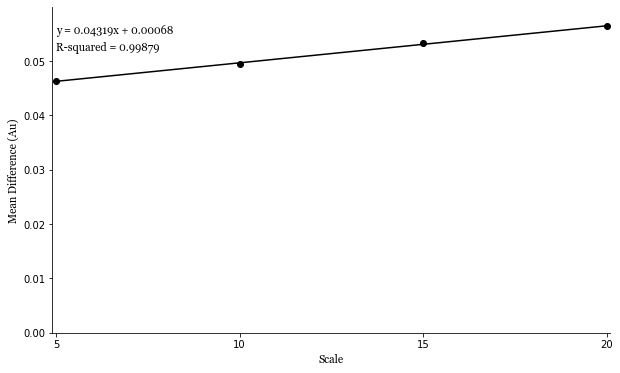

In [2001]:
#Add absolute value to mean difference to get magnitude
merged_df['Mean Difference'] = abs(merged_df['Mean Difference'])

#Figure size
pyplot.figure(figsize=(10, 6))

#Error bar
pyplot.errorbar(merged_df['Scale'], merged_df['Mean Difference'], yerr=merged_df['Interval'], fmt='ko')

#Labels use font initialized above
pyplot.xlabel('Scale', fontdict = font)
pyplot.ylabel('Mean Difference (Au)', fontdict = font)

#Fix x-axis and y-axis limits
pyplot.xlim(4.9, 20.1)
pyplot.ylim(0, 0.06)

#Fix x-axis and y-axis ticks
pyplot.xticks(np.arange(5, 25, 5))
pyplot.yticks(np.arange(0, 0.06, 0.01))

#Plot the linear regression line
pyplot.plot(np.arange(5, 25, 5), np.poly1d(np.polyfit(merged_df['Scale'], merged_df['Mean Difference'], 1))(np.arange(5, 25, 5)), color = 'black')

#Put the linear regression equation rounded to 5 digits on graScale in the center
pyplot.text(5, 0.055, 'y = ' + str(round(np.poly1d(np.polyfit(merged_df['Scale'], merged_df['Mean Difference'], 1))(0.5), 5)) + 'x + ' + str(round(np.polyfit(merged_df['Scale'], merged_df['Mean Difference'], 1)[0], 5)), fontdict = font)

#Put the R-squared value on graScale in the center
pyplot.text(5, 0.052, 'R-squared = ' + str(round(np.corrcoef(merged_df['Scale'], merged_df['Mean Difference'])[0, 1]**2, 5)), fontdict = font)

#Remove top and right borders
pyplot.gca().spines['top'].set_visible(False)
pyplot.gca().spines['right'].set_visible(False)

#Save the figure
pyplot.savefig('Graphs/E4-AA-Graph.jpg', dpi=500)

#Show the figure
pyplot.show()

#Create new dataframe with column 1) sample 2) linear regression equation 3) R-squared value
dfrr = {'Sample': 'E4-AA', 'Linear Regression Equation': str(round(np.poly1d(np.polyfit(merged_df['Scale'], merged_df['Mean Difference'], 1))[1], 5)) + 'x + ' + str(round(np.poly1d(np.polyfit(merged_df['Scale'], merged_df['Mean Difference'], 1))[0], 5)), 'R-squared': round(np.corrcoef(merged_df['Scale'], merged_df['Mean Difference'])[0, 1]**2, 5)}
dfr = dfr.append(dfrr, ignore_index = True)

## Acetaminophen

In [2002]:
#Merging the data into one dataframe
csv_file_list = ['E4-A/E4-A-5.csv', 'E4-A/E4-A-10.csv', 'E4-A/E4-A-15.csv', 'E4-A/E4-A-20.csv']

list_of_dataframes = []

for filename in csv_file_list:
    list_of_dataframes.append(pd.read_csv(filename))

merged_df = pd.concat(list_of_dataframes)

In [2003]:
#Find the percent difference between Absorbance Before and Absorbance After
merged_df['Percent Difference (%)'] = (merged_df['Absorbance After (Au)'] - merged_df['Absorbance Before (Au)'])/merged_df['Absorbance Before (Au)']
merged_df['Percent Difference (%)'] = merged_df['Percent Difference (%)']*100

#Find difference between Absorbance Before and Absorbance After
merged_df['Mean Difference'] = merged_df['Absorbance After (Au)'] - merged_df['Absorbance Before (Au)']

In [2004]:
#Create a numpy array of standard deviation and store it in the dataframe
std = []
for i in range(5, 25, 5):
    std.append(merged_df.loc[merged_df['Scale'] == i]['Mean Difference'].std())

arr = np.array(std)

#Compute the average of every 5 rows and condense the dataframe
merged_df = merged_df.groupby(np.arange(len(merged_df))//5).mean()
df = pd.DataFrame({'Standard Deviation': arr})

#Join two dataframes
merged_df = pd.concat([merged_df, df], axis=1, join='inner')

In [2005]:
#Compute the t-value (confidence level = 5%, df = 4)
t_value = scipy.stats.t.ppf(q=1-.05/2,df=4)

#Create a numpy array of intervals and store it into the dataframe
intervals = []
for i in range(5, 25, 5):
    interval = t_value * merged_df.loc[merged_df['Scale'] == i]['Standard Deviation'] / math.sqrt(5)
    intervals.append(interval)
intervals = np.array(intervals, dtype='float')
#Squeeze into one dimension
intervals = np.squeeze(intervals)

#Create new dataframe
df2 = pd.DataFrame({'Interval': intervals}, index=[0, 1, 2, 3])

#Join two dataframes
merged_df = pd.concat([merged_df, df2], axis=1, join='inner')

In [2006]:
#Create a numpy array of lower bounds and store it into the datagrame
lbd = []
for i in range(5, 25, 5):
    interval = t_value * merged_df.loc[merged_df['Scale'] == i]['Standard Deviation'] / math.sqrt(5)
    mean = merged_df.loc[merged_df['Scale'] == i]['Mean Difference']
    lbd.append(mean - interval)
lbd = np.array(lbd, dtype='float')
#Squeeze into one dimension
lbd = np.squeeze(lbd)

#Create new dataframe
df = pd.DataFrame({'Lower Bound': lbd}, index=[0, 1, 2, 3])

#Join two dataframes
merged_df = pd.concat([merged_df, df], axis=1, join='inner')

In [2007]:
#Create a numpy array of upper bounds and store it into the datagrame
ubd = []
for i in range(5, 25, 5):
    interval = t_value * merged_df.loc[merged_df['Scale'] == i]['Standard Deviation'] / math.sqrt(5)
    mean = merged_df.loc[merged_df['Scale'] == i]['Mean Difference']
    ubd.append(mean + interval)
ubd = np.array(ubd, dtype='float')
#Squeeze into one dimension
ubd = np.squeeze(ubd)

#Create new dataframe
df1 = pd.DataFrame({'Upper Bound': ubd}, index=[0, 1, 2, 3])

#Join two dataframes
merged_df = pd.concat([merged_df, df1], axis=1, join='inner')

In [2008]:
#Create a numpy array of upper bounds and store it into the datagrame
full = []
for i in range(5, 25, 5):
    mean = merged_df.loc[merged_df['Scale'] == i]['Mean Difference'].round(5).apply(str)
    interval = merged_df.loc[merged_df['Scale'] == i]['Interval'].round(5).apply(str)
    # Store string 
    full.append(mean + ' ± ' + interval)
full = np.array(full, dtype='object')

# Squeeze into one dimension
full = np.squeeze(full)

#Create new dataframe
df = pd.DataFrame({'Confidence Interval': full}, index=[0, 1, 2, 3])

#Join two dataframes
merged_df = pd.concat([merged_df, df], axis=1, join='inner')

#Remove trial column from dataframe
merged_df = merged_df.drop(['Trial'], axis=1)

#Save to new csv file
merged_df.to_csv('Processed Data/E4-A-Processed.csv')

# Keep only the columns we need
save_dfA = merged_df[['Scale', 'Percent Difference (%)', 'Mean Difference', 'Interval']]

#Output table as HTML
merged_df.to_html('Tables/E4-A-Table.html')
merged_df

,Scale,Wavelength (nm),Absorbance Before (Au),Absorbance After (Au),Percent Difference (%),Mean Difference,Standard Deviation,Interval,Lower Bound,Upper Bound,Confidence Interval
0,5.0,330.0,0.43232,0.39248,-9.215346,-0.03984,0.000493,0.000612,-0.040452,-0.039228,-0.03984 ± 0.00061
1,10.0,330.0,0.43232,0.36526,-15.511654,-0.06706,0.000089,0.000111,-0.067171,-0.066949,-0.06706 ± 0.00011
2,15.0,330.0,0.43230,0.35950,-16.840152,-0.07280,0.000173,0.000215,-0.073015,-0.072585,-0.0728 ± 0.00022
3,20.0,330.0,0.43230,0.33444,-22.637034,-0.09786,0.000385,0.000478,-0.098338,-0.097382,-0.09786 ± 0.00048


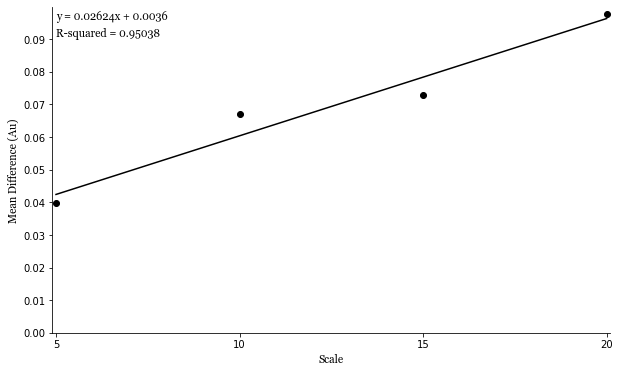

In [2009]:
#Add absolute value to mean difference to get magnitude
merged_df['Mean Difference'] = abs(merged_df['Mean Difference'])

#Figure size
pyplot.figure(figsize=(10, 6))

#Error bar
pyplot.errorbar(merged_df['Scale'], merged_df['Mean Difference'], yerr=merged_df['Interval'], fmt='ko')

#Labels use font initialized above
pyplot.xlabel('Scale', fontdict = font)
pyplot.ylabel('Mean Difference (Au)', fontdict = font)

#Fix x-axis and y-axis limits
pyplot.xlim(4.9, 20.1)
pyplot.ylim(0, 0.1)

#Fix x-axis and y-axis ticks
pyplot.xticks(np.arange(5, 25, 5))
pyplot.yticks(np.arange(0, 0.1, 0.01))

#Plot the linear regression line
pyplot.plot(np.arange(5, 25, 5), np.poly1d(np.polyfit(merged_df['Scale'], merged_df['Mean Difference'], 1))(np.arange(5, 25, 5)), color = 'black')

#Put the linear regression equation rounded to 5 digits on graScale in the center
pyplot.text(5, 0.096, 'y = ' + str(round(np.poly1d(np.polyfit(merged_df['Scale'], merged_df['Mean Difference'], 1))(0.5), 5)) + 'x + ' + str(round(np.polyfit(merged_df['Scale'], merged_df['Mean Difference'], 1)[0], 5)), fontdict = font)

#Put the R-squared value on graScale in the center
pyplot.text(5, 0.091, 'R-squared = ' + str(round(np.corrcoef(merged_df['Scale'], merged_df['Mean Difference'])[0, 1]**2, 5)), fontdict = font)

#Remove the top and right borders
pyplot.gca().spines['top'].set_visible(False)
pyplot.gca().spines['right'].set_visible(False)

#Save the figure
pyplot.savefig('Graphs/E4-A-Graph.jpg', dpi=500)

#Show the figure
pyplot.show()

#Create new dataframe with column 1) sample 2) linear regression equation 3) R-squared value
dfrr = {'Sample': 'E4-A', 'Linear Regression Equation': str(round(np.poly1d(np.polyfit(merged_df['Scale'], merged_df['Mean Difference'], 1))(0), 5)) + 'x + ' + str(round(np.poly1d(np.polyfit(merged_df['Scale'], merged_df['Mean Difference'], 1))(1), 5)), 'R-squared': round(np.corrcoef(merged_df['Scale'], merged_df['Mean Difference'])[0, 1]**2, 5)}
dfr = dfr.append(dfrr, ignore_index = True)

## Overall Analysis

/var/folders/ds/33bb8_h50z75_0klrf43_bqm0000gn/T/ipykernel_4086/3881791704.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  save_dfA['Mean Difference'] = abs(save_dfA['Mean Difference'])
/var/folders/ds/33bb8_h50z75_0klrf43_bqm0000gn/T/ipykernel_4086/3881791704.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  save_dfAA['Mean Difference'] = abs(save_dfAA['Mean Difference'])
/var/folders/ds/33bb8_h50z75_0klrf43_bqm0000gn/T/ipykernel_4086/3881791704.py:7: SettingWithCopyWarning: 
A value is trying to be 

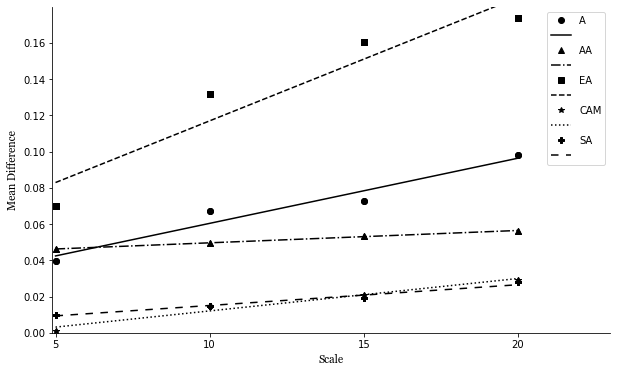

,Sample,Linear Regression Equation,R-squared
0,E4-SA,0.00419x + 0.00115,0.96666
1,E4-EA,0.04887x + 0.05568,0.90556
2,E4-CAM,0.00179x + -0.0058,0.96791
3,E4-AA,0.00068x + 0.04285,0.99879
4,E4-A,0.02444x + 0.02804,0.95038


In [2010]:
#Plot all the save_dfs data on the same plot with different color
pyplot.figure(figsize=(10, 6))

#Make mean difference positive
save_dfA['Mean Difference'] = abs(save_dfA['Mean Difference'])
save_dfAA['Mean Difference'] = abs(save_dfAA['Mean Difference'])
save_dfSA['Mean Difference'] = abs(save_dfSA['Mean Difference'])
save_dfCAM['Mean Difference'] = abs(save_dfCAM['Mean Difference'])
save_dfEA['Mean Difference'] = abs(save_dfEA['Mean Difference'])

#Plot save_dfA with blue circle markers 
pyplot.plot(save_dfA['Scale'], save_dfA['Mean Difference'], 'ko')

#save_dfA error bar line
pyplot.errorbar(save_dfA['Scale'], save_dfA['Mean Difference'], yerr=save_dfA['Interval'], fmt='ko')

#Linear regression line in blue
pyplot.plot(np.arange(5, 25, 5), np.poly1d(np.polyfit(save_dfA['Scale'], save_dfA['Mean Difference'], 1))(np.arange(5, 25, 5)), 'k-')

#Plot save_dfAA with red triangle markers
pyplot.plot(save_dfAA['Scale'], save_dfAA['Mean Difference'], 'k^')

#save_dfAA error bar
pyplot.errorbar(save_dfAA['Scale'], save_dfAA['Mean Difference'], yerr=save_dfAA['Interval'], fmt='k^')

#Linear regression line in red
pyplot.plot(np.arange(5, 25, 5), np.poly1d(np.polyfit(save_dfAA['Scale'], save_dfAA['Mean Difference'], 1))(np.arange(5, 25, 5)), 'k-.')

#Plot save_dfEA with green square markers
pyplot.plot(save_dfEA['Scale'], save_dfEA['Mean Difference'], 'ks')

#save_dfEA error bar
pyplot.errorbar(save_dfEA['Scale'], save_dfEA['Mean Difference'], yerr=save_dfEA['Interval'], fmt='ks')

#Linear regression line in green
pyplot.plot(np.arange(5, 25, 5), np.poly1d(np.polyfit(save_dfEA['Scale'], save_dfEA['Mean Difference'], 1))(np.arange(5, 25, 5)), 'k--')

#Plot save_dfCAM with black star markers
pyplot.plot(save_dfCAM['Scale'], save_dfCAM['Mean Difference'], 'k*')

#save_dfCAM error bar
pyplot.errorbar(save_dfCAM['Scale'], save_dfCAM['Mean Difference'], yerr=save_dfCAM['Interval'], fmt='k*')

#Linear regression line in black
pyplot.plot(np.arange(5, 25, 5), np.poly1d(np.polyfit(save_dfCAM['Scale'], save_dfCAM['Mean Difference'], 1))(np.arange(5, 25, 5)), 'k:')

#Plot save_dfSA with yellow plus markers
pyplot.plot(save_dfSA['Scale'], save_dfSA['Mean Difference'], 'kP')

#save_dfSA error bar
pyplot.errorbar(save_dfSA['Scale'], save_dfSA['Mean Difference'], yerr=save_dfSA['Interval'], fmt='kP')

#Linear regression line in yellow
pyplot.plot(np.arange(5, 25, 5), np.poly1d(np.polyfit(save_dfSA['Scale'], save_dfSA['Mean Difference'], 1))(np.arange(5, 25, 5)), 'k-', dashes = (5, 5))

#Label the plot
pyplot.xlabel('Scale', fontdict = font)
pyplot.ylabel('Mean Difference (Au)', fontdict = font)

#Remove top and right borders
pyplot.gca().spines['top'].set_visible(False)
pyplot.gca().spines['right'].set_visible(False)

#Fix x-axis and y-axis limits
pyplot.xlim(4.9, 23)
pyplot.ylim(0, 0.18)

#Fix x-axis and y-axis ticks
pyplot.xticks(np.arange(5, 23, 5))
pyplot.yticks(np.arange(0, 0.18, 0.02))

#Print legend of the plot where A = blue line, AA = red line, SA = green line, CAM = black line, EA = yellow line and show the line and color next to each other on top right 
pyplot.legend(['A', '', 'AA', '', 'EA', '', 'CAM', '', 'SA', ''], loc = 'upper right')

#Save data
dfr.to_csv('Processed Data/E4-Plot-Data.csv')

#Save graph
pyplot.savefig('Graphs/E4-Plot-Graph.jpg', dpi=500)

#Display the plot
pyplot.show()
dfr